In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

Text(0.5, 1.0, 'Frequency response')

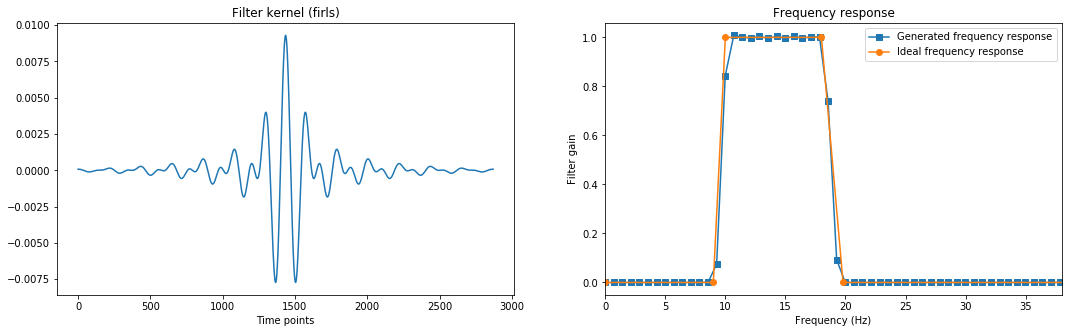

In [9]:
# define filter parameters
lower_band = 10  # Hz
upper_band = 18  # Hz

# IF THIS TRANSITIONS ARE NOT EQUAL, filtering_kernel LOOKS AWFUL
lower_transition = .1
upper_transition = .1

sample_rate = 2048  # Hz
order = 14 * np.round(sample_rate / lower_band) + 1

filter_shape = [0, 0, 1, 1, 0, 0]
filter_freqs = [0, lower_band * (1 - lower_transition), lower_band, upper_band,
                upper_band * (1 + upper_transition), sample_rate / 2]

filtering_kernel = signal.firls(order, filter_freqs, filter_shape, fs=sample_rate)
hz_filter = np.linspace(0, sample_rate / 2, int(np.floor(len(filtering_kernel) / 2) + 1))
filtering_kernel_power = np.abs(np.fft.fft(filtering_kernel)) ** 2

plt.figure(figsize=(18, 5))
plt.subplot(121)
plt.plot(filtering_kernel)
plt.xlabel('Time points')
plt.title('Filter kernel (firls)')

plt.subplot(122)
plt.plot(hz_filter, filtering_kernel_power[:len(hz_filter)], 's-', label='Generated frequency response')
plt.plot(filter_freqs, filter_shape, 'o-', label='Ideal frequency response')
plt.legend()
plt.xlim([0, upper_band + 20])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Filter gain')
plt.title('Frequency response')



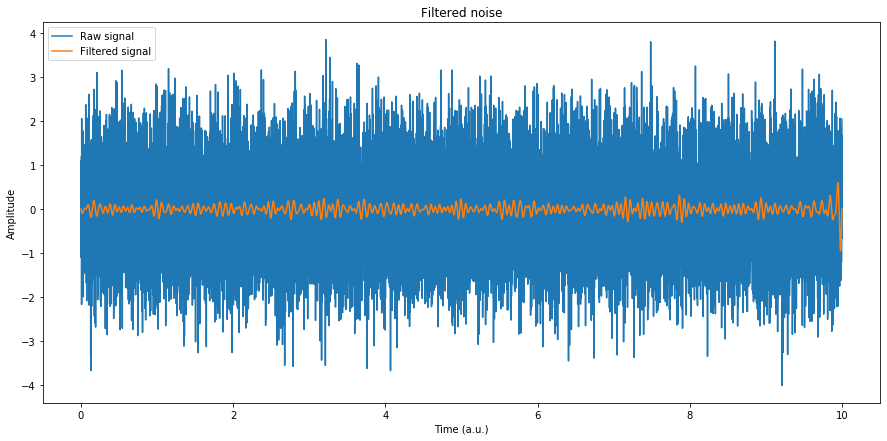

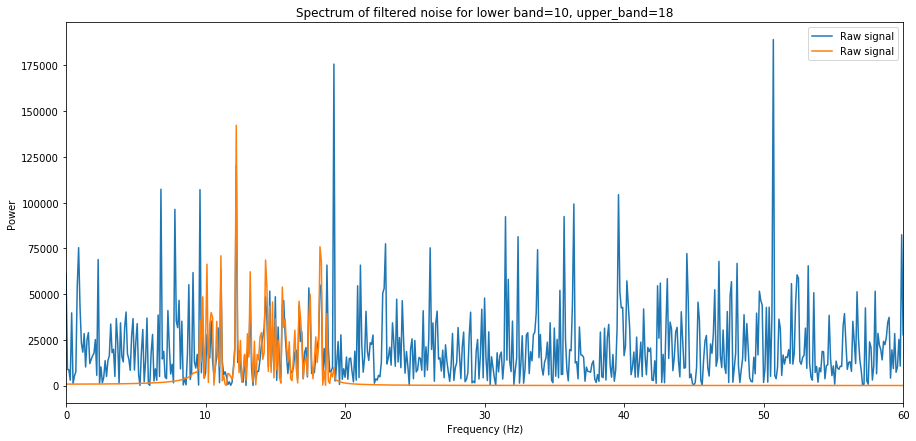

In [13]:
#Applying filter to random noisy data

raw_signal = np.random.randn(sample_rate * 10)
filtered_signal = signal.filtfilt(filtering_kernel, 1, raw_signal)
time_axis = np.arange(0, len(filtered_signal)) / sample_rate

# plot time series
plt.figure(figsize=(15, 7))
plt.plot(time_axis, raw_signal, label='Raw signal')
plt.plot(time_axis, filtered_signal, label='Filtered signal')
plt.xlabel('Time (a.u.)')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Filtered noise')
plt.show()

# plot power spectrum
raw_signal_power = np.abs(np.fft.fft(raw_signal)) ** 2
filtered_signal_power = np.abs(np.fft.fft(filtered_signal)) ** 2
hz_signal = np.linspace(0, sample_rate / 2, int(np.floor(len(raw_signal) / 2) + 1))

plt.figure(figsize=(15, 7))
plt.plot(hz_signal, raw_signal_power[:len(hz_signal)], label='Raw signal')
plt.plot(hz_signal, filtered_signal_power[:len(hz_signal)], label='Raw signal')
plt.xlim([0, 60])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.legend()
plt.title('Spectrum of filtered noise for lower band={0}, upper_band={1}'.format(lower_band, upper_band))
plt.show()